In [137]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from IPython.display import display

### 0) Описание задачи

В датасете содержатся данные об обучающихся (такие, как количество часов обучения, количество часов сна, наличие доступа к интернету и т. д.). Задача состоит в том, чтобы по данным из датасета определить, сдаст обучающийся экзамен или нет. Экзамен считается сданным, если набрано ≥ 70 баллов.

### 1) Считывание данных

In [138]:
url = "https://raw.githubusercontent.com/aartyomm/ml_2024/refs/heads/master/StudentPerformanceFactors.csv"
data_raw = pd.read_csv(url)

In [139]:
data_raw['Exam_Passed'] = data_raw['Exam_Score'].apply(lambda x: 1 if x >= 70 else 0)
data_raw.drop(columns=['Exam_Score'], inplace=True)

In [140]:
print(data_raw.shape)
data_raw

(6607, 20)


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Passed
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,0
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,0
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,1
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,1
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,0
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,0
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,0
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,0


In [141]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

В таблице есть такие столбцы

- `Hours_Studied` - количество часов, потраченных на учебу в неделю
- `Attendance` - процент посещенных занятий
- `Parental_Involvement` - уровень участия родителей в образовании студента (низкий, средний, высокий)
- `Access_to_Resources` - наличие образовательных ресурсов (низкий, средний, высокий)
- `Extracurricular_Activities` - участие во внеклассной деятельности (да, нет)
- `Sleep_Hours` - среднее количество часов сна за ночь
- `Previous_Sores` - баллы за предыдущие экзамены
- `Motivation_Level` - уровень мотивации студента (низкий, средний, высокий)
- `Internet_Access` - наличие доступа в интернет (да, нет)
- `Tutoring_Sessions` - количество посещенных занятий с репетитором в месяц
- `Family_Income` - уровень дохода семьи (низкий, средний, высокий)
- `Teacher_Quality` - качество работы учителей (низкое, среднее, высокое)
- `School_Type` - тип посещаемой школы (государственная, частная)
- `Peer_Influence` - влияние сверстников на успеваемость (положительное, нейтральное, отрицательное)
- `Physical_Activity` - среднее количество часов физической активности в неделю
- `Learning_Disabilities` - наличие проблем с обучением (да, нет)
- `Parental_Education_Level` - уровень образования родителей (средняя школа, колледж, аспирантура)
- `Distance_from_Home` - расстояние от дома до школы (близко, умеренно, далеко)
- `Gender` - пол обучающегося (мужской, женский)
- `Exam_Score` - Итоговый экзаменационный балл

Заменим тип столбцов `Parental_Involvement`, `Access_to_Resources`, `Extracurricular_Activities`, `Motivation_Level`, `Internet_Access`, `Family_Income`, `Teacher_Quality`, `School_Type`, `Peer_Influence`, `Learning_Disabilities`, `Parental_Education_Level`, `Distance_from_Home`, `Gender` на специальный, предназначенный для хранения категориальных значений

In [142]:
#data_raw['Parental_Involvement'] = data_raw['Parental_Involvement'].astype('category')

# Список столбцов, которые нужно преобразовать
category_columns = [
    'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities',
    'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality',
    'School_Type', 'Peer_Influence', 'Learning_Disabilities',
    'Parental_Education_Level', 'Distance_from_Home', 'Gender'
]

# Преобразование всех указанных столбцов в категориальные
data_raw[category_columns] = data_raw[category_columns].apply(lambda x: x.astype('category'))


In [143]:
data_raw['Parental_Involvement'].dtype

CategoricalDtype(categories=['High', 'Low', 'Medium'], ordered=False, categories_dtype=object)

### 2) Визуализация данных и основные характеристки

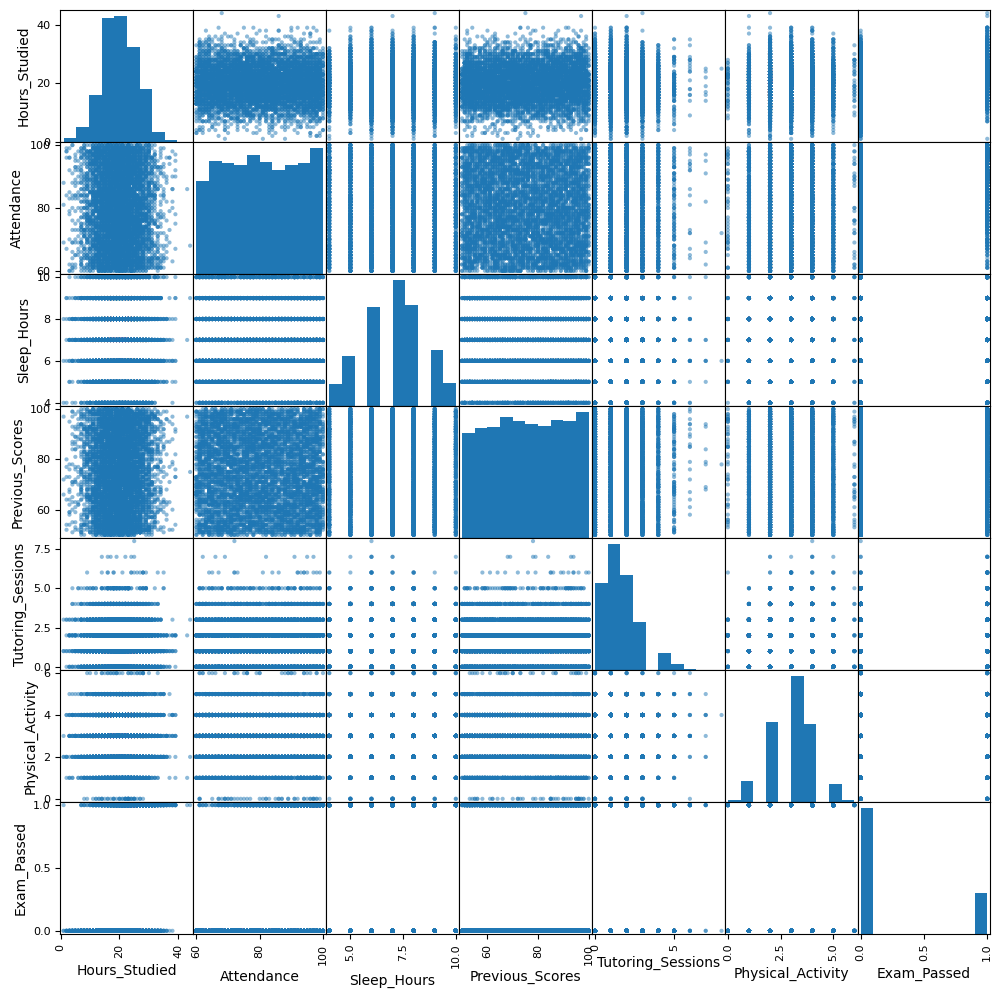

In [144]:
pd.plotting.scatter_matrix(data_raw, figsize = (12, 12))
pass

In [145]:
#data_raw.describe()
display(data_raw.describe())
display(data_raw.describe(include=['category']))

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Passed
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,0.245951
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,0.430682
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,0.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,0.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,0.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,0.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,1.000000


,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
count,6607,6607,6607,6607,6607,6607,6529,6607,6607,6607,6517,6540,6607
unique,3,3,2,3,2,3,3,2,3,2,3,3,2
top,Medium,Medium,Yes,Medium,Yes,Low,Medium,Public,Positive,No,High School,Near,Male
freq,3362,3319,3938,3351,6108,2672,3925,4598,2638,5912,3223,3884,3814


In [146]:
#data_raw.describe(include=['category'])

Матрица корреляции

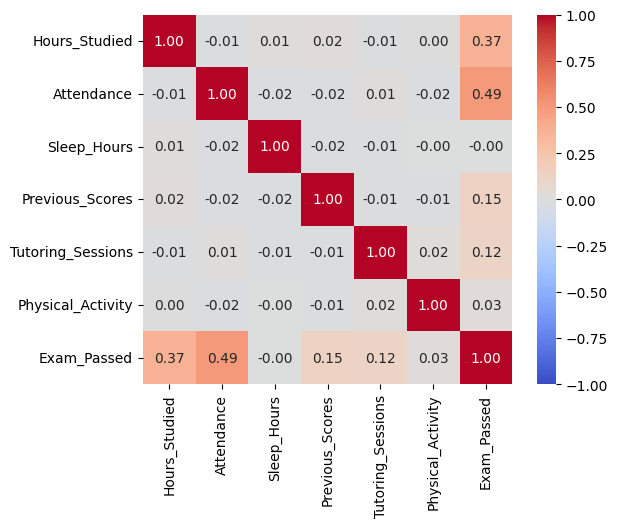

In [147]:
corr_mat = data_raw.corr(numeric_only=True)
sns.heatmap(corr_mat, square=True, annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')
pass

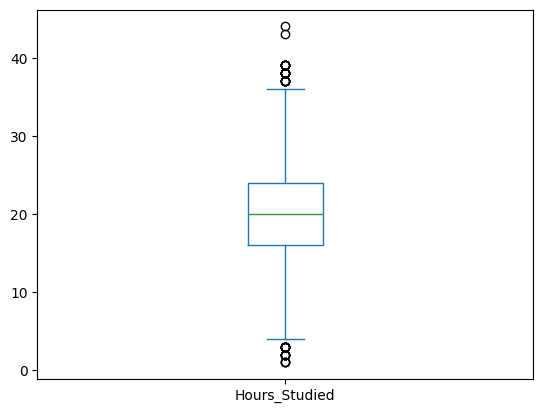

In [148]:
data_raw['Hours_Studied'].plot(kind='box')
pass

In [149]:
data_raw['Hours_Studied'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

,Hours_Studied
0.005,4.0
0.010,6.0
0.050,10.0
0.100,12.0
0.500,20.0
0.900,28.0
0.950,30.0
0.990,34.0
0.995,35.0


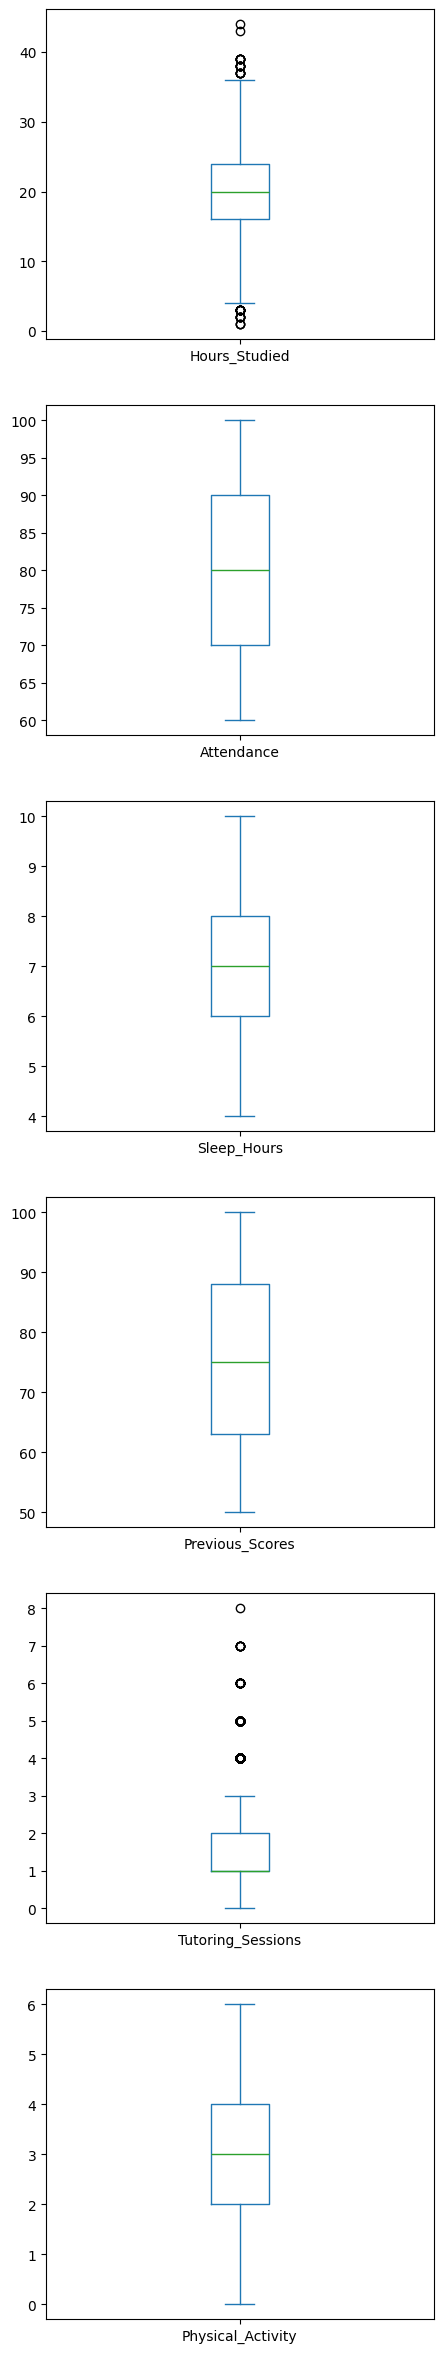

In [150]:
#data_raw.select_dtypes(include='int64').plot.box(figsize=(10, 6), rot=45, title="Ящики с усами для числовых столбцов")
data_raw.select_dtypes(include='number').loc[:, data_raw.select_dtypes(include='number').columns != 'Exam_Passed'].plot.box(subplots=True,
                                            layout=(len(data_raw.select_dtypes(include='number').columns) - 1, 1),
                                            figsize=(5, (len(data_raw.select_dtypes(include='number').columns) - 1) * 5))
pass

В датасете можно наблюдать несколько столбцов с подозрениями на выбросы (`Hours_Studied`, `Sleep_Hours`, `Tutoring_Sessions`), однако, все значения лежат в рамках допустимых. А количество тех значений, которые лежат вне "усов" ящика, небольшое.

По матрице корреляции можно видеть, что парметры не коррелируют между собой, а с `Exam_Passed` коррелируют все праметры, кроме `Sleep_Hours`и `Physical_Activity`.  
Низкая корреляция между параметрами говорит о том, что парметры независимы между собой - каждый параметр может вносить уникальную информацию в модель, не дублируя информацию, содержащуюся в других признаках. Это может быть полезно для некоторых моделей, таких как дерево решений и его ансамбли (например, случайный лес) и вызывать трудности у линейных моделей.  
В датасете `Attendance` и `Hours_Studied` имеют умеренную корреляцию с целевым параметром `Exam_Passed`. Это может говорить о том, что сдача экзамена обусловлена совокупностью факторов, а не одним-двумя ключевыми параметрами.
Такие признаки, как `Sleep_Hours`, `Physical_Activity` оказывают минимальное влияние на сдачу экзамена и не сильно связаны с другими параметрами. Это может означать, что их влияние на результат также невелико.  
Отсутствие корреляции между признаками может говорить о том, что в данных присутствуют нелинейные зависимости, которые трудно выявить с помощью простого анализа корреляций. В этом случае нелинейные модели, такие как градиентный бустинг, случайный лес, нейронные сети, могут лучше улавливать сложные зависимости между признаками и целевым значением.

### 3) Обработка пропущенных значений

In [151]:
display(data_raw.isnull().sum())
#display(data_raw.isnull())

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [152]:
from sklearn.impute import SimpleImputer
#imp_num = SimpleImputer(missing_values=np.nan, strategy='median')
imp_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

data = data_raw
imp_cat.fit(data[['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']])
data[['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']] = imp_cat.transform(data[['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']])

#numeric_cols = data.select_dtypes(include=['float64']).columns
#categorical_cols = data.select_dtypes(include=['category']).columns
#imp_num.fit(data[numeric_cols])
#imp_cat.fit(data[categorical_cols])
#print(numeric_cols)
#print(categorical_cols)

display(data.isnull().sum())

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


### 4) Обработка категориальных признаков

In [153]:
data_proc = data
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='if_binary', sparse_output=False)
enc.fit(data_proc[category_columns])

dummies = pd.DataFrame(enc.transform(data_proc[category_columns]),
                       columns=enc.get_feature_names_out(), index=data_proc.index)
dummies.head()

,Parental_Involvement_High,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_High,Access_to_Resources_Low,Access_to_Resources_Medium,Extracurricular_Activities_Yes,Motivation_Level_High,Motivation_Level_Low,Motivation_Level_Medium,Internet_Access_Yes,Family_Income_High,Family_Income_Low,Family_Income_Medium,Teacher_Quality_High,Teacher_Quality_Low,Teacher_Quality_Medium,School_Type_Public,Peer_Influence_Negative,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_Yes,Parental_Education_Level_College,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Far,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Male
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [154]:
data_proc = pd.concat((data_proc, dummies), axis=1).drop(category_columns, axis=1)
data_proc.head()
data_proc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 36 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Hours_Studied                          6607 non-null   int64  
 1   Attendance                             6607 non-null   int64  
 2   Sleep_Hours                            6607 non-null   int64  
 3   Previous_Scores                        6607 non-null   int64  
 4   Tutoring_Sessions                      6607 non-null   int64  
 5   Physical_Activity                      6607 non-null   int64  
 6   Exam_Passed                            6607 non-null   int64  
 7   Parental_Involvement_High              6607 non-null   float64
 8   Parental_Involvement_Low               6607 non-null   float64
 9   Parental_Involvement_Medium            6607 non-null   float64
 10  Access_to_Resources_High               6607 non-null   float64
 11  Acce

### 5) Нормализация

In [155]:
numeric_columns = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions' , 'Physical_Activity']
data_proc[numeric_columns] = (data_proc[numeric_columns] - data_proc[numeric_columns].mean(axis = 0))/data_proc[numeric_columns].std(axis = 0)
data_proc[numeric_columns].describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity
count,6.607000e+03,6.607000e+03,6.607000e+03,6.607000e+03,6.607000e+03,6.607000e+03
mean,-1.226001e-16,-3.043493e-16,-1.898150e-16,2.054089e-16,5.108337e-17,1.505615e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.167520e+00,-1.730027e+00,-2.063223e+00,-1.741035e+00,-1.213843e+00,-2.877735e+00
25%,-6.635951e-01,-8.640372e-01,-7.009372e-01,-8.382439e-01,-4.012113e-01,-9.383058e-01
50%,4.118256e-03,1.952967e-03,-1.979408e-02,-4.898077e-03,-4.012113e-01,3.140895e-02
75%,6.718316e-01,8.679432e-01,6.613490e-01,8.978932e-01,4.114199e-01,1.001124e+00
max,4.010399e+00,1.733933e+00,2.023635e+00,1.731239e+00,5.287208e+00,2.940553e+00


In [156]:
data_proc

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Passed,Parental_Involvement_High,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_High,Access_to_Resources_Low,Access_to_Resources_Medium,Extracurricular_Activities_Yes,Motivation_Level_High,Motivation_Level_Low,Motivation_Level_Medium,Internet_Access_Yes,Family_Income_High,Family_Income_Low,Family_Income_Medium,Teacher_Quality_High,Teacher_Quality_Low,Teacher_Quality_Medium,School_Type_Public,Peer_Influence_Negative,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_Yes,Parental_Education_Level_College,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Far,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Male
0,0.504903,0.348349,-0.019794,-0.143789,-1.213843,0.031409,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
1,-0.162810,-1.383631,0.661349,-1.116026,0.411420,1.001124,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.671832,1.560735,-0.019794,1.106230,0.411420,1.001124,1,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,1.506473,0.781344,0.661349,1.592348,-0.401211,1.001124,1,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,-0.162810,1.041141,-0.700937,-0.699353,1.224051,1.001124,1,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,0.838760,-0.950636,-0.019794,0.064547,-0.401211,-0.938306,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6603,0.504903,-0.344443,0.661349,0.411775,1.224051,-0.938306,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6604,0.004118,0.867943,-0.700937,-0.699353,1.224051,-0.938306,0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6605,-1.665165,0.521547,-0.700937,1.106230,0.411420,0.031409,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


### 6) Разбивка данных на обучающую и тестовую выборки

In [157]:
X = data_proc.drop(['Exam_Passed'], axis=1)
y = data['Exam_Passed']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, d = X_train.shape
N_test,  d = X_test.shape

N_train, N_test, d

(4955, 1652, 35)

### 7) Запуск классификатора (подсчёт ошибок, поиск оптимального количества соседей)

In [158]:
from sklearn.metrics import accuracy_score

def print_accuracy (y_train, y_train_predict, y_test, y_test_predict):
  # Точность на обучающей выборке
  train_accuracy = accuracy_score(y_train, y_train_predict)
  print(f'Train Accuracy: {train_accuracy:.2f}')

  # Точность на тестовой выборке
  test_accuracy = accuracy_score(y_test, y_test_predict)
  print(f'Test Accuracy: {test_accuracy:.2f}')


res_table = pd.DataFrame(columns=('train', 'test'))
name_of_res_table = "Misclassification rate" #Доля неверных предсказаний

Метод ближайших соседей

In [159]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 3)
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

res_train  = np.mean(y_train != y_train_predict)
res_test  = np.mean(y_test != y_test_predict)

res_table.loc['3 Nearest Neighbours', :] = (res_train, res_test)
res_table.style.set_caption(name_of_res_table)

,train,test
3 Nearest Neighbours,0.063976,0.145278


In [160]:
print_accuracy(y_train, y_train_predict, y_test, y_test_predict)

Train Accuracy: 0.94
Test Accuracy: 0.85


In [161]:
"""
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_test_predict)

plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
"""
pass

Подбор лучшего числа ближайших соседей

In [162]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 13, 14, 15, 16, 17, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.11160760834147931 15


In [163]:
model = KNeighborsClassifier(n_neighbors = 15)
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

res_train  = np.mean(y_train != y_train_predict)
res_test  = np.mean(y_test != y_test_predict)

res_table.loc['15 Nearest Neighbours', :] = (res_train, res_test)
print_accuracy(y_train, y_train_predict, y_test, y_test_predict)

Train Accuracy: 0.91
Test Accuracy: 0.88


Оптимальное количество ближайших соседей - 15  
При таком количестве достигается наименьшая ошибка на тестовой выборке



---



Случайный лес использует случайный отбор признаков для построения каждого дерева, что позволяет ему выявлять наиболее важные признаки для классификации. Метод k-NN не выполняет отбор признаков и может включать нерелевантные или избыточные признаки, что может ухудшать его производительность.  
При наличии несбалансированных классов случайный лес может лучше справляться с задачей классификации, поскольку он учитывает информацию о классе в процессе построения деревьев. K-NN может быть менее эффективным в таких случаях.  
Исходя из выводов, сделанных по матрице корреляции и того, что классы в датасете несбалансированы, можно предположить, что случайный лес будет работать точнее метода ближайших соседей.

Случайный лес

In [164]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=200) # по умолчанию n_estimators=100
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

res_train  = np.mean(y_train != y_train_predict)
res_test  = np.mean(y_test != y_test_predict)
res_table.loc['Random Forest', :] = (res_train, res_test)
print_accuracy(y_train, y_train_predict, y_test, y_test_predict)

Train Accuracy: 1.00
Test Accuracy: 0.91


Случайный лес показал лучшую точность как на тренировочной, так и на тестовой выборке.  


---



Полносвязная нейронная сеть

In [167]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(20,10), max_iter=1000)
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

res_train  = np.mean(y_train != y_train_predict)
res_test  = np.mean(y_test != y_test_predict)
res_table.loc['MLP', :] = (res_train, res_test)
print_accuracy(y_train, y_train_predict, y_test, y_test_predict)

Train Accuracy: 1.00
Test Accuracy: 0.97


In [166]:
display(res_table.style.set_caption(name_of_res_table))

,train,test
3 Nearest Neighbours,0.063976,0.145278
15 Nearest Neighbours,0.092432,0.119855
Random Forest,0.000000,0.089588
MLP,0.006660,0.026029


### 8) Общие выводы

Запустив 3 метода классификации можно сказать, что лучше всех себя показала полносвязная нейронная сеть. Случайный лес исключил ошибки на тренировочной выборке, но имеет большее количество ошибок на тестовой выборке. Метод ближайших соседей показал себя хуже всех. (Однако ошибка в приведённыхпримерах не превышает 15%)

Такие результаты объясняются тем, что в данном наборе данных отсутствует корреляция между признаками. Как говорилось выше, это может говорить о том, что в данных присутствуют нелинейные зависимости, которые трудно выявить с помощью простого анализа корреляций. В этом случае нелинейные модели лучше улавливают сложные зависимости между признаками и целевым значением, что и продемонстрировали примеры.  
Также в датасете несбалансированные классы, что вызывает дополнительные трудности у линейных моделей.